<a href="https://colab.research.google.com/github/narora76/PyProject/blob/master/Airbnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from geopy.distance import great_circle

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
#1. Load and view the data
airbnb = pd.read_csv('/Users/kach/Downloads/listings_2.csv')

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
airbnb.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59
5,29051,https://www.airbnb.com/rooms/29051,20190808195507,2019-08-09,Comfortable single room,because of the city imposing a 4 paying guest ...,In a monumental house right in the center of A...,because of the city imposing a 4 paying guest ...,none,the street is quite lively especially on weeke...,...,f,f,moderate,f,f,3,0,3,0,4.25
6,31080,https://www.airbnb.com/rooms/31080,20190808195507,2019-08-09,2-story apartment + rooftop terrace,NaN,My apartment is light and cosy. The three bed...,My apartment is light and cosy. The three bed...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.33
7,38266,https://www.airbnb.com/rooms/38266,20190808195507,2019-08-09,Nice and quiet place in the Jordaan,Cosy 1 bedroom apartment in Amsterdam's Jordaa...,"The apartment has a very nice feel with ""rivie...",Cosy 1 bedroom apartment in Amsterdam's Jordaa...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.81
8,42970,https://www.airbnb.com/rooms/42970,20190808195507,2019-08-09,Comfortable room@PERFECT location + 2 bikes,A home away from home Great location Including...,"What I offer: great location, comfortable bed,...",A home away from home Great location Including...,none,My home is in the best neighborhood. Everythin...,...,t,f,strict_14_with_grace_period,f,t,2,0,2,0,4.19
9,43109,https://www.airbnb.com/rooms/43109,20190808195507,2019-08-09,Oasis in the middle of Amsterdam,NaN,Welcome to my beautiful. light and spacious (1...,Welcome to my beautiful. light and spacious (1...,none,You almost can't be more central then this.,...,f,f,moderate,f,f,1,1,0,0,17.77


In [0]:
airbnb.shape

(20677, 106)

In [0]:
#set display rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 250)

In [0]:
#view column types
airbnb.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [0]:
#view columns missing data
airbnb.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               35
summary                                           629
space                                            5422
description                                       219
experiences_offered                                 0
neighborhood_overview                            6584
notes                                           11523
transit                                          6302
access                                           8468
interaction                                      7988
house_rules                                      7883
thumbnail_url                                   20677
medium_url                                      20677
picture_url                                         0
xl_picture_url              

In [0]:
#2. Clean and prepare the data

In [0]:
#is ID unique
airbnb['id'].nunique()

20677

In [0]:
airbnb['last_scraped'] =  pd.to_datetime(airbnb['last_scraped'], format='%Y-%m-%d')

In [0]:
#most data is concurrent
airbnb.groupby('last_scraped')['price'].count()

last_scraped
2019-08-08     7451
2019-08-09    13225
2019-09-03        1
Name: price, dtype: int64

In [0]:
airbnb.name.fillna(value='', inplace=True)

In [0]:
airbnb['name'].isna().sum()

0

In [0]:
airbnb.summary.fillna(value='', inplace=True)

In [0]:
airbnb.description.fillna(value='', inplace=True)

In [0]:
#Assume is security deposit is NA, it is zero
airbnb.security_deposit.fillna(value=0, inplace=True)

In [0]:
#Same assumption for cleaning fee
airbnb.cleaning_fee.fillna(value=0, inplace=True)

In [0]:
airbnb.host_name.fillna(value='', inplace=True)

In [0]:
airbnb.host_about.fillna(value='', inplace=True)

In [0]:
airbnb['host_since'] = airbnb['host_since'].fillna(pd.Timestamp('19000101'))

In [0]:
airbnb['host_since'] =  pd.to_datetime(airbnb['host_since'], format='%Y-%m-%d')

In [0]:
airbnb.groupby('host_since')['price'].count()

host_since
1900-01-01    12
2008-09-24     1
2008-10-12     1
2009-01-04     1
2009-02-15     1
              ..
2019-08-02     4
2019-08-05     3
2019-08-06     7
2019-08-07     4
2019-08-08     2
Name: price, Length: 3047, dtype: int64

In [0]:
airbnb.groupby('host_response_time')['price'].count()

host_response_time
a few days or more     333
within a day          2570
within a few hours    3016
within an hour        6217
Name: price, dtype: int64

In [0]:
airbnb['host_response_time'].isnull().sum()

8541

In [0]:
airbnb['host_response_rate'].isnull().sum()

8541

In [0]:
#host_response_rate has too many NaN, hence going to drop this column later - cannot fill in with a value

In [0]:
airbnb.groupby('host_is_superhost')['price'].count()

host_is_superhost
f    17451
t     3214
Name: price, dtype: int64

In [0]:
airbnb['host_is_superhost'] = airbnb['host_is_superhost'].fillna('f')

In [0]:
airbnb['host_listings_count'] = airbnb['host_listings_count'].fillna(0)

In [0]:
airbnb['host_total_listings_count'] = airbnb['host_total_listings_count'].fillna(0)

In [0]:
airbnb.groupby('host_verifications')['price'].count()

host_verifications
None                                                                                                                                                                12
['email', 'facebook', 'reviews', 'jumio']                                                                                                                            7
['email', 'facebook', 'reviews', 'selfie', 'identity_manual']                                                                                                        2
['email', 'facebook', 'reviews', 'work_email']                                                                                                                       1
['email', 'facebook', 'reviews']                                                                                                                                     5
['email', 'facebook', 'work_email']                                                                                                               

In [0]:
airbnb.groupby('host_has_profile_pic')['price'].count()

host_has_profile_pic
f       16
t    20649
Name: price, dtype: int64

In [0]:
airbnb['host_has_profile_pic'] = airbnb['host_has_profile_pic'].fillna('f')

In [0]:
airbnb.groupby('host_identity_verified')['price'].count()

host_identity_verified
f    12602
t     8063
Name: price, dtype: int64

In [0]:
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].fillna('f')

In [0]:
#everything is Amsterdam
airbnb.groupby('city')['price'].count()

city
1015 SN Amsterdam                   1
AMSTERDAM                           1
Amstelveen                          3
Amsterdam                       20374
Amsterdam                          16
Amsterdam (Zunderdorp)              3
Amsterdam West                      1
Amsterdam Zuid-Oost                32
Amsterdam Zuidoost                  3
Amsterdam, Noord-Holland, NL        2
Amsterdam-Zuidoost                172
Amsterdão                           1
Badhoevedorp                        1
Bos en Lommer                       1
Central Amsterdam                   1
De Pijp                             6
Diemen                             10
Duivendrecht                       10
Haarlem                             1
Halfweg                             5
Jordaan                             3
Jordaan, Amsterdam                  1
Landsmeer                           3
Lijnden                             1
Nederland                           1
North Amsterdam                     7
Waterga

In [0]:
airbnb.city.value_counts(normalize=True)

Amsterdam                       0.985537
Amsterdam-Zuidoost              0.008320
Amsterdam Zuid-Oost             0.001548
Amsterdam                       0.000774
Duivendrecht                    0.000484
Diemen                          0.000484
North Amsterdam                 0.000339
De Pijp                         0.000290
Halfweg                         0.000242
Watergraafsmeer                 0.000242
Jordaan                         0.000145
Amsterdam Zuidoost              0.000145
Landsmeer                       0.000145
Amstelveen                      0.000145
Amsterdam (Zunderdorp)          0.000145
Amsterdam, Noord-Holland, NL    0.000097
amsterdam                       0.000097
1015 SN Amsterdam               0.000048
Zwanenburg                      0.000048
Lijnden                         0.000048
Watergang                       0.000048
Bos en Lommer                   0.000048
Amsterdam West                  0.000048
Central Amsterdam               0.000048
AMSTERDAM       

In [0]:
airbnb['city'] = airbnb['city'].fillna('Amsterdam')

In [0]:
airbnb.country.value_counts(normalize=True)

Netherlands    1.0
Name: country, dtype: float64

In [0]:
airbnb.property_type.value_counts(normalize=True)

Apartment                 0.765682
House                     0.079364
Townhouse                 0.032452
Bed and breakfast         0.026551
Loft                      0.018958
Boat                      0.016975
Condominium               0.016153
Houseboat                 0.014025
Guest suite               0.007061
Aparthotel                0.005755
Serviced apartment        0.003337
Guesthouse                0.002370
Boutique hotel            0.002080
Other                     0.001886
Villa                     0.001886
Hostel                    0.001403
Hotel                     0.001112
Tiny house                0.000580
Cottage                   0.000580
Cabin                     0.000484
Camper/RV                 0.000242
Chalet                    0.000145
Bungalow                  0.000145
Casa particular (Cuba)    0.000145
Yurt                      0.000097
Barn                      0.000097
Earth house               0.000048
Tent                      0.000048
Campsite            

In [0]:
airbnb.room_type.value_counts(normalize=True)

Entire home/apt    0.793249
Private room       0.202834
Shared room        0.003917
Name: room_type, dtype: float64

In [0]:
airbnb.accommodates.value_counts(normalize=True)

2     0.541423
4     0.306186
3     0.080573
1     0.023504
6     0.019877
5     0.018813
8     0.003869
7     0.002370
16    0.001451
10    0.000580
12    0.000532
9     0.000387
14    0.000145
11    0.000145
18    0.000048
17    0.000048
30    0.000048
Name: accommodates, dtype: float64

In [0]:
airbnb.bathrooms.value_counts(normalize=True)

1.0     0.770693
1.5     0.158289
2.0     0.046732
2.5     0.012191
3.0     0.003919
0.5     0.003628
3.5     0.002032
0.0     0.001355
4.0     0.000726
5.0     0.000145
4.5     0.000097
8.0     0.000097
15.0    0.000048
5.5     0.000048
Name: bathrooms, dtype: float64

In [0]:
#filling NaN bathrooms with 0
airbnb['bathrooms'] = airbnb['bathrooms'].fillna(0)

In [0]:
airbnb.bedrooms.value_counts(normalize=True)

1.0     0.588466
2.0     0.242005
3.0     0.083942
0.0     0.055736
4.0     0.024336
5.0     0.003919
6.0     0.000532
7.0     0.000290
12.0    0.000290
10.0    0.000194
8.0     0.000194
11.0    0.000048
9.0     0.000048
Name: bedrooms, dtype: float64

In [0]:
#filling NaN bedrooms with 0
airbnb['bedrooms'] = airbnb['bedrooms'].fillna(0)

In [0]:
#filling NaN beds with 0
airbnb['beds'] = airbnb['beds'].fillna(0)

In [0]:
airbnb.has_availability.value_counts(normalize=True)

t    1.0
Name: has_availability, dtype: float64

In [0]:
#filling NaN scores with 0
airbnb['review_scores_rating'] = airbnb['review_scores_rating'].fillna(0)

In [0]:
#filling NaN scores with 0
airbnb['review_scores_accuracy'] = airbnb['review_scores_accuracy'].fillna(0)

In [0]:
#filling NaN scores with 0
airbnb['review_scores_cleanliness'] = airbnb['review_scores_cleanliness'].fillna(0)

In [0]:
#filling NaN scores with 0
airbnb['review_scores_checkin'] = airbnb['review_scores_checkin'].fillna(0)

In [0]:
#filling NaN scores with 0
airbnb['review_scores_communication'] = airbnb['review_scores_communication'].fillna(0)

In [0]:
#filling NaN scores with 0
airbnb['review_scores_location'] = airbnb['review_scores_location'].fillna(0)

In [0]:
#filling NaN scores with 0
airbnb['review_scores_value'] = airbnb['review_scores_value'].fillna(0)

In [0]:
airbnb.instant_bookable.value_counts(normalize=True)

f    0.736374
t    0.263626
Name: instant_bookable, dtype: float64

In [0]:
airbnb.cancellation_policy.value_counts(normalize=True)

strict_14_with_grace_period    0.387067
moderate                       0.362352
flexible                       0.243906
super_strict_60                0.005417
super_strict_30                0.001257
Name: cancellation_policy, dtype: float64

In [0]:
#filling NaN ''
airbnb['cancellation_policy'] = airbnb['cancellation_policy'].fillna('')

In [0]:
from collections import Counter

In [0]:
results = Counter()
airbnb['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

0        None
1        None
2        None
3        None
4        None
         ... 
20672    None
20673    None
20674    None
20675    None
20676    None
Name: amenities, Length: 20677, dtype: object

In [0]:
#Most common amenities
results.most_common(30)

[('Wifi', 20141),
 ('Heating', 19934),
 ('Essentials', 19904),
 ('Kitchen', 18704),
 ('Smoke detector', 16593),
 ('TV', 16061),
 ('Washer', 15617),
 ('Hangers', 14852),
 ('Laptop friendly workspace', 14093),
 ('Iron', 13813),
 ('Shampoo', 13773),
 ('Hair dryer', 13651),
 ('Hot water', 10011),
 ('Dryer', 9192),
 ('Fire extinguisher', 8695),
 ('Carbon monoxide detector', 8430),
 ('Family/kid friendly', 8107),
 ('First aid kit', 7774),
 ('Cable TV', 7761),
 ('Refrigerator', 7111),
 ('Internet', 6856),
 ('Dishes and silverware', 6809),
 ('Bed linens', 6740),
 ('Private entrance', 6621),
 ('Coffee maker', 6277),
 ('Oven', 6075),
 ('Stove', 5965),
 ('Cooking basics', 5916),
 ('Host greets you', 5785),
 ('Dishwasher', 5564)]

In [0]:
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])

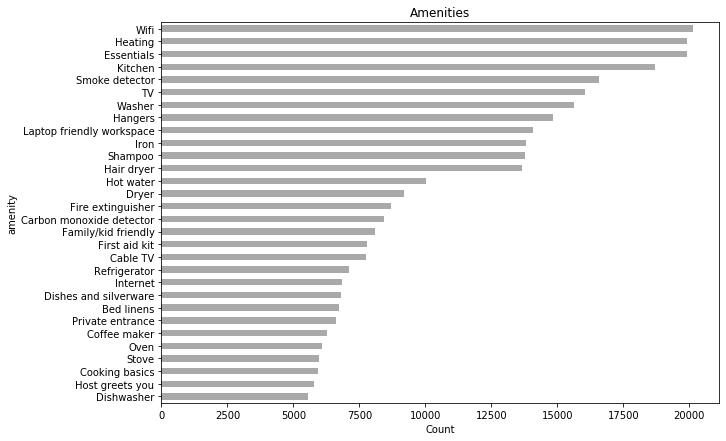

In [0]:
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

In [0]:
#splitting amenities into their separate columns
airbnb['smoke_detector'] = airbnb['amenities'].str.contains('Smoke detector')
airbnb['TV'] = airbnb['amenities'].str.contains('TV')
airbnb['washer'] = airbnb['amenities'].str.contains('Washer')
airbnb['hangers'] = airbnb['amenities'].str.contains('Hangers')
airbnb['Laptop_friendly_workspace'] = airbnb['amenities'].str.contains('Laptop friendly workspace')
airbnb['iron'] = airbnb['amenities'].str.contains('Iron')
airbnb['shampoo'] = airbnb['amenities'].str.contains('Shampoo')
airbnb['hair_dryer'] = airbnb['amenities'].str.contains('Hair dryer')
airbnb['hot_water'] = airbnb['amenities'].str.contains('Hot water')
airbnb['dryer'] = airbnb['amenities'].str.contains('Dryer')
airbnb['fire_ex'] = airbnb['amenities'].str.contains('Fire extiguisher')
airbnb['carbon_monoxide_detect'] = airbnb['amenities'].str.contains('Carbon monoxide detector')
airbnb['Family_kid_friendly'] = airbnb['amenities'].str.contains('Family/kid friendly')

In [0]:
airbnb.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
summary                                             0
space                                            5422
description                                         0
experiences_offered                                 0
neighborhood_overview                            6584
notes                                           11523
transit                                          6302
access                                           8468
interaction                                      7988
house_rules                                      7883
thumbnail_url                                   20677
medium_url                                      20677
picture_url                                         0
xl_picture_url              

In [0]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['host_is_superhost','host_verifications','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','is_business_travel_ready','cancellation_policy','smoke_detector','TV','washer','hangers','Laptop_friendly_workspace','iron','shampoo','hair_dryer','hot_water','dryer','fire_ex','carbon_monoxide_detect','Family_kid_friendly'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [0]:
#drop columns with too many NaN
airbnb.drop(columns=['thumbnail_url','medium_url','xl_picture_url','host_response_rate','host_acceptance_rate','neighbourhood_group_cleansed','square_feet','weekly_price','monthly_price','license'], inplace=True)

In [0]:
airbnb.neighbourhood_cleansed.value_counts(normalize=True)

De Baarsjes - Oud-West                    0.171640
De Pijp - Rivierenbuurt                   0.123809
Centrum-West                              0.112589
Centrum-Oost                              0.086908
Westerpark                                0.073995
Zuid                                      0.070803
Oud-Oost                                  0.065242
Bos en Lommer                             0.057068
Oostelijk Havengebied - Indische Buurt    0.047637
Oud-Noord                                 0.030227
Watergraafsmeer                           0.028582
IJburg - Zeeburgereiland                  0.023746
Slotervaart                               0.019539
Noord-West                                0.018136
Noord-Oost                                0.013783
Buitenveldert - Zuidas                    0.012574
Geuzenveld - Slotermeer                   0.010930
De Aker - Nieuw Sloten                    0.007448
Osdorp                                    0.007351
Gaasperdam - Driemond          

In [0]:
#Create column to calculate distance to Amsterdam center
def distance_to_mid(lat, lon):
    amsterdam_centre = (52.379189, 4.899431)
    accommodation = (lat, lon)
    return great_circle(amsterdam_centre, accommodation).km

In [0]:
airbnb['distance'] = airbnb.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

In [0]:
airbnb['size'] = airbnb['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)

In [0]:
airbnb['size'] = airbnb['size'].str.replace("\D", "")

In [0]:
airbnb['size'] = airbnb['size'].astype(float)

In [0]:
airbnb['size'].isnull().sum()

9032

In [0]:
#Lots of sizes (above) are still unknown - can think of regressing using bedrooms/bathrooms data later

In [0]:
#create data_filtered

In [0]:
data_filtered = airbnb.copy()

In [0]:
data_filtered['host_is_superhost'] = airbnb_en['host_is_superhost']

In [0]:
data_filtered['host_verifications'] = airbnb_en['host_verifications']

In [0]:
data_filtered['host_has_profile_pic'] = airbnb_en['host_has_profile_pic']

In [0]:
data_filtered['host_identity_verified'] = airbnb_en['host_identity_verified']

In [0]:
data_filtered['is_location_exact'] = airbnb_en['is_location_exact']

In [0]:
data_filtered['instant_bookable'] = airbnb_en['instant_bookable']

In [0]:
data_filtered['is_business_travel_ready'] = airbnb_en['is_business_travel_ready']

In [0]:
data_filtered['cancellation_policy'] = airbnb_en['cancellation_policy']

In [0]:
data_filtered['smoke_detector'] = airbnb_en['smoke_detector']

In [0]:
data_filtered['TV'] = airbnb_en['TV']

In [0]:
data_filtered['washer'] = airbnb_en['washer']

In [0]:
data_filtered['hangers'] = airbnb_en['hangers']

In [0]:
data_filtered['Laptop_friendly_workspace'] = airbnb_en['Laptop_friendly_workspace']

In [0]:
data_filtered['iron'] = airbnb_en['iron']

In [0]:
data_filtered['shampoo'] = airbnb_en['shampoo']

In [0]:
data_filtered['hair_dryer'] = airbnb_en['hair_dryer']

In [0]:
data_filtered['hot_water'] = airbnb_en['hot_water']

In [0]:
data_filtered['dryer'] = airbnb_en['dryer']

In [0]:
data_filtered['fire_ex'] = airbnb_en['fire_ex']

In [0]:
data_filtered['carbon_monoxide_detect'] = airbnb_en['carbon_monoxide_detect']

In [0]:
data_filtered['Family_kid_friendly'] = airbnb_en['Family_kid_friendly']

In [0]:
data_filtered.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,smoke_detector,TV,washer,hangers,Laptop_friendly_workspace,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance,size
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,https://a0.muscache.com/im/pictures/10272854/8...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,0,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,0,0,0,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,0,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",$59.00,$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",0,0,0,f,f,1,0,1,0,2.12,0,0,0,0,0,0,0,0,0,0,0,0,0,3.218476,15.0
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,https://a0.muscache.com/im/pictures/69979664/3...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,1,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,Grachtengordel,2

In [0]:
data_filtered.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
summary                                             0
space                                            5422
description                                         0
experiences_offered                                 0
neighborhood_overview                            6584
notes                                           11523
transit                                          6302
access                                           8468
interaction                                      7988
house_rules                                      7883
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                   

In [0]:
airbnb['price'].head()

0     $59.00
1     $80.00
2    $125.00
3    $150.00
4     $75.00
Name: price, dtype: object

In [0]:
airbnb.price = airbnb.price.str.replace('$', '').str.replace(',', '').astype(float)

In [0]:
data_filtered.price = data_filtered.price.str.replace('$', '').str.replace(',', '').astype(float)

In [0]:
airbnb['price'].head()

0     59.0
1     80.0
2    125.0
3    150.0
4     75.0
Name: price, dtype: float64

In [0]:
#3. Exploratory data analysis

In [0]:
data_filtered.price.describe()

count    20677.000000
mean       159.078686
std        162.464267
min          0.000000
25%         99.000000
50%        130.000000
75%        180.000000
max       8915.000000
Name: price, dtype: float64

In [0]:
#How many prices out of 20677 under 400!!
data_filtered[data_filtered['price']<400]['price'].count()

20048

In [0]:
data_filtered = data_filtered[data_filtered['price']<400]

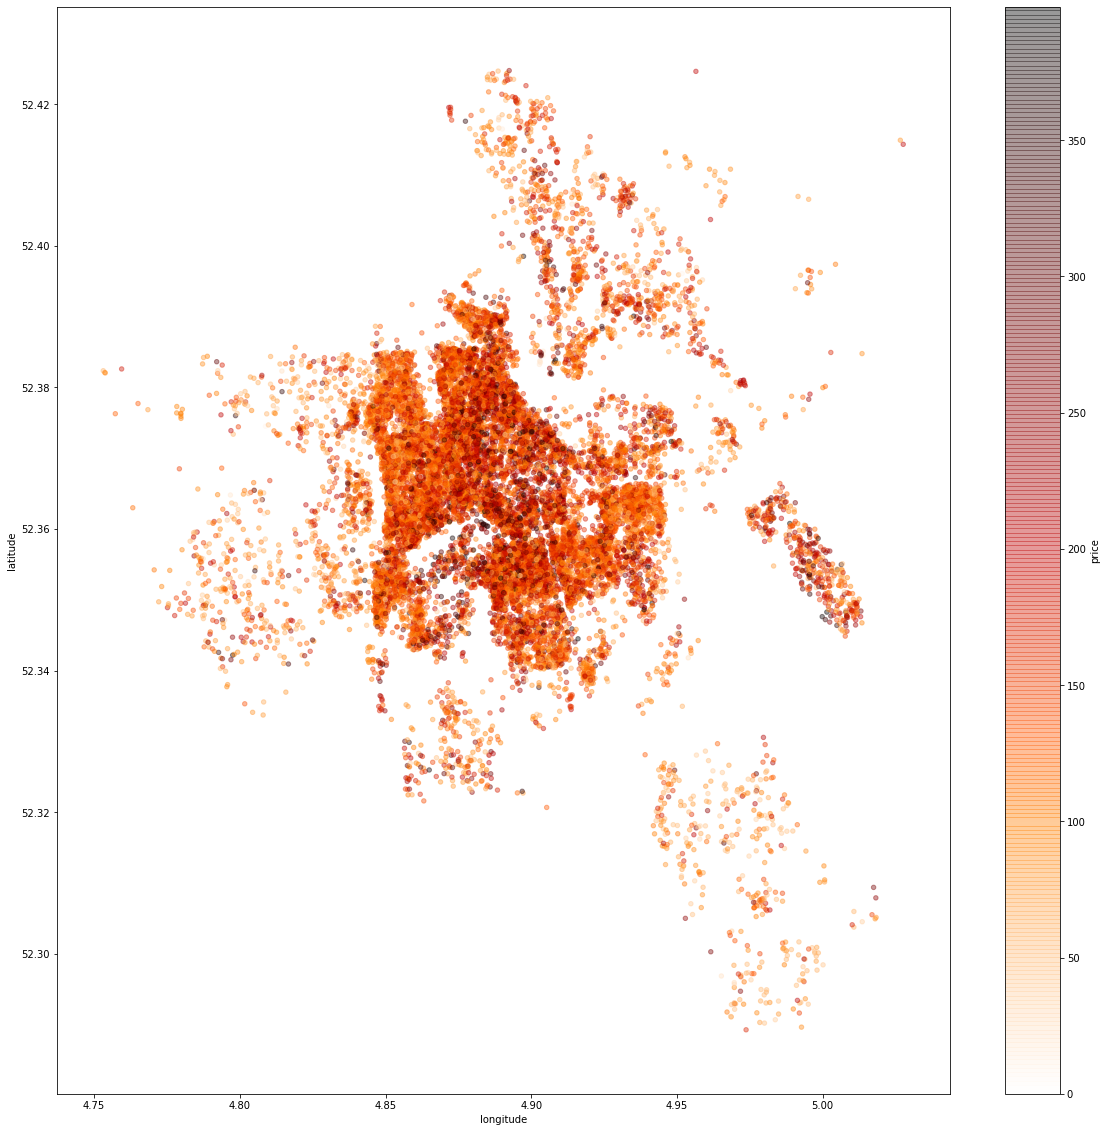

In [0]:
data_filtered.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(20,20), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

In [0]:
#Map of Amsterdam (below)

Text(0.5, 1.0, 'Neighbourhood Group Location')

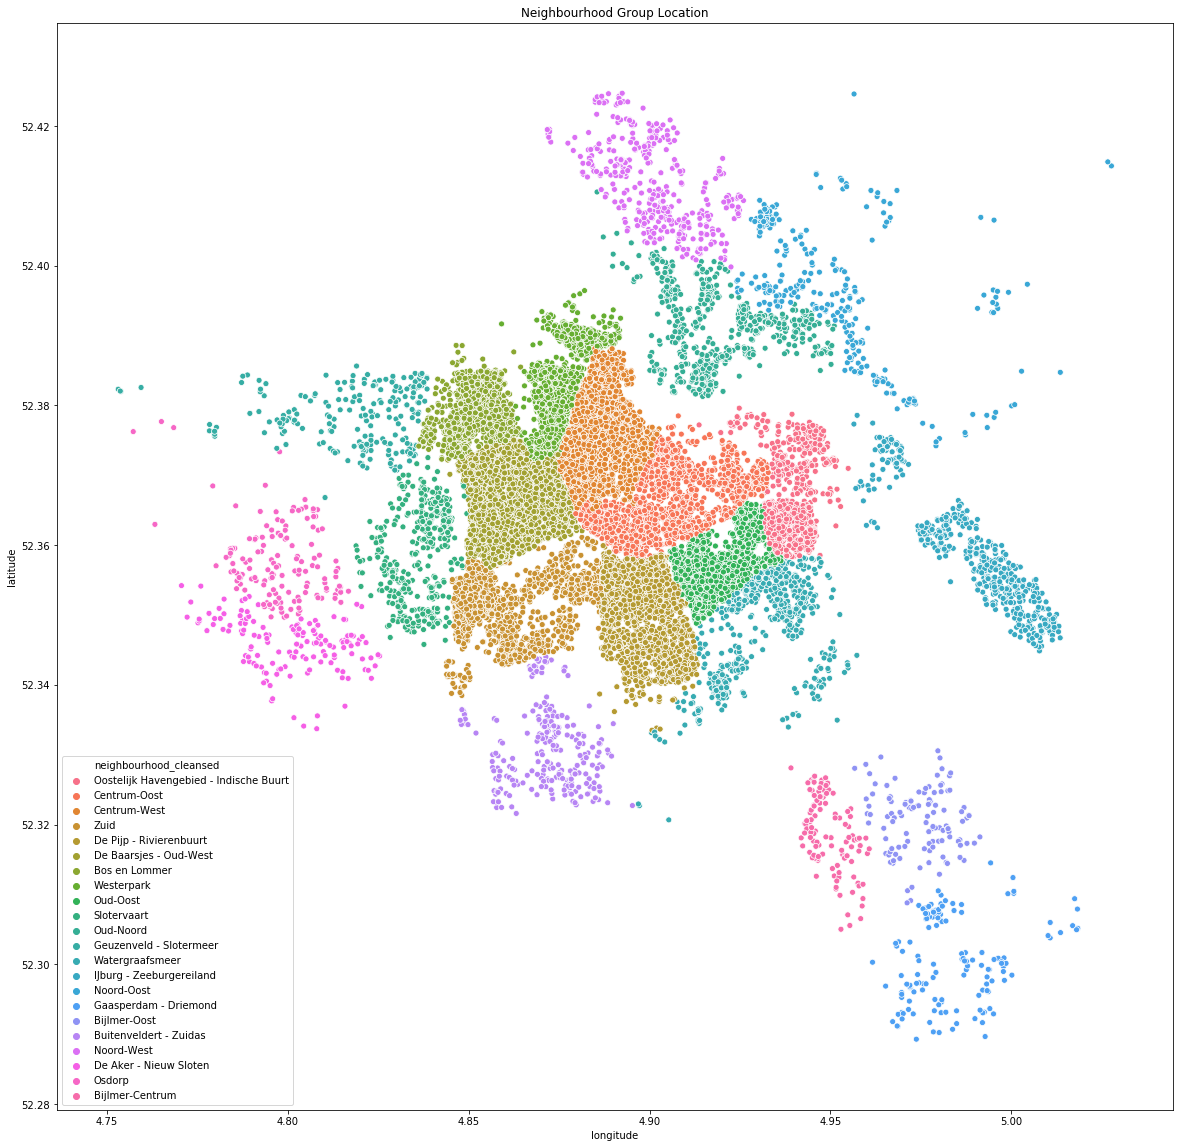

In [0]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(20,20))
sns.scatterplot(data_filtered.longitude,data_filtered.latitude,hue=data_filtered.neighbourhood_cleansed).set_title(title)

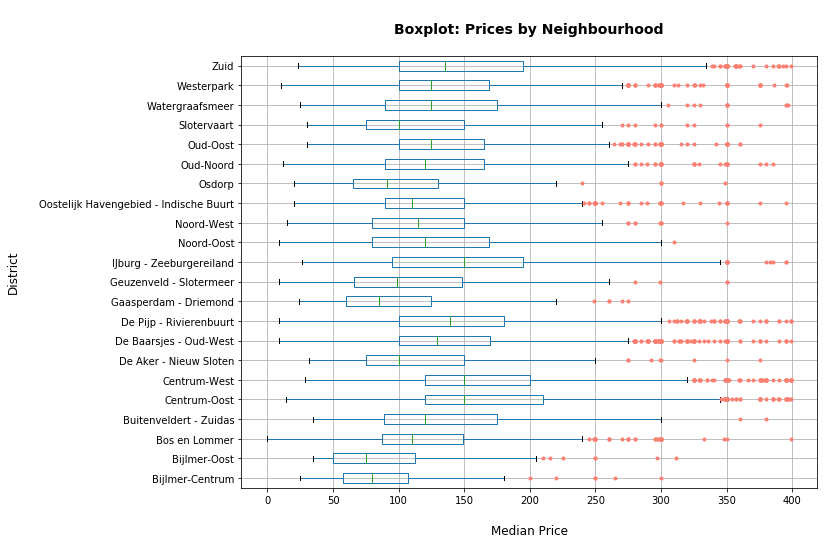

In [0]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

data_filtered.boxplot(column='price', by='neighbourhood_cleansed', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');

In [0]:
#Zuid, Noord-Oost, Centrum-West and Centrum-Ost have higher prices (As witnessed both BoxPlot and Scatter graph)
#Multiple locations with high prices, not just the ones close to Centrum

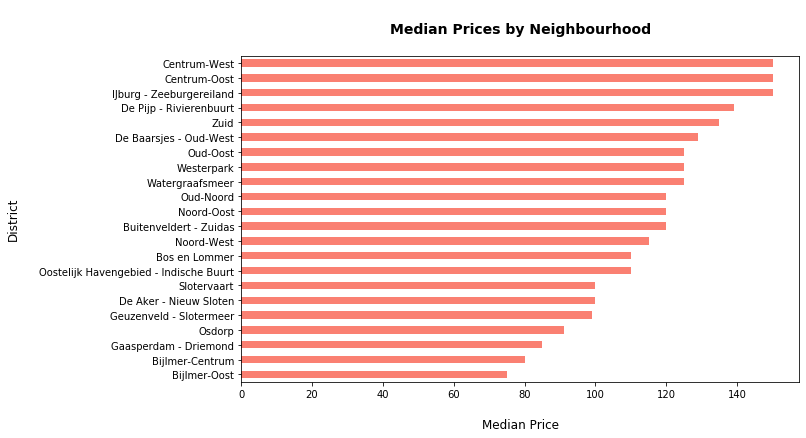

In [0]:
df_grouped = pd.DataFrame(data_filtered.groupby(['neighbourhood_cleansed'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_cleansed', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

In [0]:
data_filtered['distance'].head()

0    3.218476
1    1.617946
2    1.289920
3    0.975727
4    1.453960
Name: distance, dtype: float64

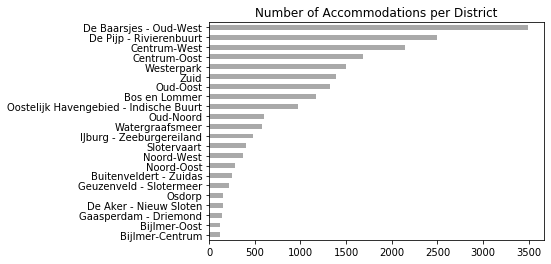

In [0]:
data_filtered['neighbourhood_cleansed'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of Accommodations per District');

In [0]:
y ='price'

In [0]:
x='room_type'

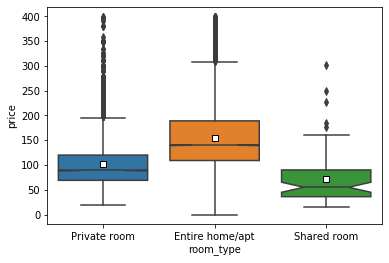

In [0]:
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})

In [0]:
#Above shows price relation to Room_type

In [0]:
#Attempt to look at other independent variables via corr function

In [0]:
data_filtered.corr().round(decimals=3)

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,smoke_detector,TV,washer,hangers,Laptop_friendly_workspace,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance,size
id,1.000,-0.0,0.505,0.050,0.078,0.078,0.309,-0.002,-0.285,-0.007,0.014,0.005,-0.001,0.051,-0.035,-0.035,0.067,-0.141,-0.031,0.044,-0.031,-0.026,0.022,0.031,-0.028,0.026,0.156,0.151,0.138,-0.017,-0.321,-0.068,-0.250,-0.255,-0.250,-0.259,-0.257,-0.240,-0.252,-0.236,NaN,0.164,0.079,0.076,0.066,0.058,0.181,-0.002,-0.089,0.070,-0.127,-0.012,-0.048,-0.010,-0.051,-0.043,-0.037,NaN,0.011,-0.389,0.070,-0.015
scrape_id,-0.000,1.0,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,NaN,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,NaN,0.000,0.000,-0.000,0.000
host_id,0.505,-0.0,1.000,0.034,0.017,0.017,0.359,0.020,-0.364,-0.004,0.025,0.008,0.008,0.004,-0.041,0.002,0.025,-0.078,-0.023,0.062,-0.023,-0.017,0.018,0.035,-0.019,0.025,0.165,0.174,0.171,0.089,-0.135,0.009,-0.158,-0.156,-0.154,-0.155,-0.153,-0.140,-0.154,-0.235,NaN,0.100,0.014,0.011,0.066,0.069,0.168,0.036,-0.036,0.121,-0.066,0.016,0.020,-0.003,-0.002,0.006,-0.072,NaN,0.028,-0.214,0.035,-0.009
host_is_superhost,0.050,-0.0,0.034,1.000,0.054,0.054,0.021,0.016,-0.064,-0.011,-0.003,-0.024,0.035,0.010,0.071,0.028,-0.004,-0.034,0.001,0.064,0.003,-0.001,0.058,0.059,0.001,0.059,-0.086,-0.109,-0.133,-0.149,-0.360,-0.438,-0.166,-0.166,-0.176,-0.163,-0.159,-0.157,-0.160,0.051,NaN,0.089,0.059,0.063,-0.078,0.029,-0.378,0.074,0.047,-0.083,0.124,0.079,0.092,0.138,0.166,0.226,0.018,NaN,0.108,0.001,0.019,-0.019
host_listings_count,0.078,0.0,0.017,0.054,1.000,1.000,-0.047,-0.007,-0.109,0.008,-0.014,0.032,0.004,0.009,-0.003,0.002,0.002,-0.025,-0.010,-0.025,-0.006,0.001,-0.025,-0.026,-0.002,-0.026,-0.007,-0.012,-0.017,-0.019,-0.038,-0.034,-0.030,-0.023,-0.023,-0.047,-0.035,-0.018,-0.032,-0.156,NaN,-0.099,0.893,0.892,0.097,0.348,-0.035,-0.044,0.039,0.036,-0.044,-0.069,0.040,0.050,-0.026,0.092,-0.015,NaN,-0.058,-0.020,-0.035,0.018
host_total_listings_count,0.078,0.0,0.017,0.054,1.000,1.000,-0.047,-0.007,-0.109,0.008,-0.014,0.032,0.004,0.009,-0.003,0.002,0.002,-0.025,-0.010,-0.025,-0.006,0.001,-0.025,-0.026,-0.002,-0.026,-0.007,-0.012,-0.017,-0.019,-0.038,-0.034,-0.030,-0.023,-0.023,-0.047,-0.035,-0.018,-0.032,-0.156,NaN,-0.099,0.893,0.892,0.097,0.348,-0.035,-0.044,0.039,0.036,-0.044,-0.069,0.040,0.050,-0.026,0.092,-0.015,NaN,-0.058,-0.020,-0.035,0.018
host_verifications,0.309,-0.0,0.359,0.021,-0.047,-0.047,1.000,0.031,-0.224,-0.018,0.033,0.006,0.010,0.024,-0.006,-0.007,0.035,-0.040,-0.013,0.033,-0.013,-0.010,0.016,0.020,-0.011,0.018,0.076,0.079,0.077,0.018,-0.097,0.006,-0.135,-0.135,-0.133,-0.136,-0.133,-0.121,-0.133,-0.097,NaN,0.062,-0.062,-0.065,0.041,-0.022,0.100,0.020,-0.039,0.046,-0.048,-0.009,-0.010,-0.007,-0.020,-0.022,-0.013,NaN,0.009,-0.139,0.010,0.022
host_has_profile_pic,-

In [0]:
#4. Start building a simple model with a few independent variables (going to omit adding 2 highly correlated X variables)

In [0]:
x = data_filtered[['accommodates','bathrooms','guests_included','extra_people','minimum_nights','cleaning_fee','security_deposit','review_scores_location','TV','iron','dryer','smoke_detector','hangers']]

In [0]:
x.dtypes

accommodates                int64
bathrooms                 float64
guests_included             int64
extra_people               object
minimum_nights              int64
cleaning_fee               object
security_deposit           object
review_scores_location    float64
TV                          int64
iron                        int64
dryer                       int64
smoke_detector              int64
hangers                     int64
dtype: object

In [0]:
#initial model run then add or subtract variables

In [0]:
airbnb.extra_people = airbnb.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

In [0]:
airbnb.cleaning_fee = airbnb.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)

In [0]:
airbnb.security_deposit = airbnb.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)

In [0]:
data_filtered.extra_people = data_filtered.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

In [0]:
data_filtered.cleaning_fee = data_filtered.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)

In [0]:
data_filtered.security_deposit = data_filtered.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)

In [0]:
x

,accommodates,bathrooms,guests_included,extra_people,minimum_nights,cleaning_fee,security_deposit,review_scores_location,TV,iron,dryer,smoke_detector,hangers
0,2,1.5,1,$20.00,3,$60.00,$200.00,10.0,0,0,0,0,0
1,2,1.0,2,$0.00,1,0,0,10.0,1,1,0,0,0
2,3,1.0,2,$10.00,14,$40.00,$300.00,10.0,1,0,1,0,0
3,2,1.0,1,$0.00,2,$0.00,$0.00,10.0,1,1,0,0,0
4,2,1.0,1,$0.00,2,0,0,10.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20672,2,1.0,1,$0.00,1,0,0,0.0,1,0,0,0,1
20673,4,1.0,1,$0.00,3,0,0,0.0,1,1,0,0,1
20674,2,1.0,1,$15.00,3,$20.00,$200.00,0.0,0,1,0,1,1
20675,2,1.0,1,$0.00,1,$39.00,$250.00,0.0,0,0,1,0,0


In [0]:
x = data_filtered[['accommodates','bathrooms','guests_included','extra_people','minimum_nights','cleaning_fee','security_deposit','review_scores_location','TV','iron','dryer','smoke_detector','hangers']]

In [0]:
x.describe()

,accommodates,bathrooms,guests_included,extra_people,minimum_nights,cleaning_fee,security_deposit,review_scores_location,TV,iron,dryer,smoke_detector,hangers
count,20048.000000,20048.000000,20048.000000,20048.00000,20048.000000,16445.000000,14019.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000
mean,2.814395,1.144827,1.436901,11.11657,3.510625,38.605777,217.606677,8.238029,0.780976,0.335445,0.438747,0.198972,0.284018
std,1.167568,0.357717,0.845830,22.51641,18.726737,21.763438,363.072984,3.254476,0.413595,0.472158,0.496246,0.399237,0.450957
min,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.00000,2.000000,25.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,0.00000,2.000000,39.000000,150.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,2.000000,20.00000,3.000000,50.000000,250.000000,10.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,17.000000,15.000000,16.000000,280.00000,1001.000000,531.000000,4736.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
airbnb['cleaning_fee'] = airbnb['cleaning_fee'].fillna(0)

In [0]:
airbnb['security_deposit'] = airbnb['security_deposit'].fillna(0)

In [0]:
data_filtered['cleaning_fee'] = data_filtered['cleaning_fee'].fillna(0)

In [0]:
data_filtered['security_deposit'] = data_filtered['security_deposit'].fillna(0)

In [0]:
x = data_filtered[['accommodates','bathrooms','guests_included','extra_people','minimum_nights','cleaning_fee','security_deposit','review_scores_location','TV','iron','dryer','smoke_detector','hangers']]

In [0]:
x.describe()

,accommodates,bathrooms,guests_included,extra_people,minimum_nights,cleaning_fee,security_deposit,review_scores_location,TV,iron,dryer,smoke_detector,hangers
count,20048.000000,20048.000000,20048.000000,20048.00000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000,20048.000000
mean,2.814395,1.144827,1.436901,11.11657,3.510625,31.667598,152.166201,8.238029,0.780976,0.335445,0.438747,0.198972,0.284018
std,1.167568,0.357717,0.845830,22.51641,18.726737,24.662647,319.586831,3.254476,0.413595,0.472158,0.496246,0.399237,0.450957
min,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.00000,2.000000,10.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,0.00000,2.000000,30.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,2.000000,20.00000,3.000000,50.000000,250.000000,10.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,17.000000,15.000000,16.000000,280.00000,1001.000000,531.000000,4736.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.3220888180324808


In [0]:
x[['room_type']] = airbnb_en[['room_type']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x[['host_is_superhost']] = data_filtered[['host_is_superhost']]
x[['host_verifications']] = data_filtered[['host_verifications']]
x[['host_has_profile_pic']] = data_filtered[['host_has_profile_pic']]
x[['host_identity_verified']] = data_filtered[['host_identity_verified']]
x[['availability_30']] = data_filtered[['availability_30']]
x[['review_scores_checkin']] = data_filtered[['review_scores_checkin']]
x[['review_scores_cleanliness']] = data_filtered[['review_scores_cleanliness']]
x[['review_scores_location']] = data_filtered[['review_scores_location']]
x[['instant_bookable']] = data_filtered[['instant_bookable']]
x[['is_business_travel_ready']] = data_filtered[['is_business_travel_ready']]
x[['cancellation_policy']] = data_filtered[['cancellation_policy']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
def Encode_1(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en_1 = Encode(data_filtered.copy())

In [0]:
airbnb_en_1 = Encode_1(data_filtered.copy())

In [0]:
airbnb_en_1[['room_type']]

,room_type
0,0
1,0
2,1
3,0
4,0
...,...
20672,2
20673,1
20674,0
20675,1


In [0]:
data_filtered[['room_type']] = airbnb_en_1[['room_type']]

In [0]:
#redo x
x = data_filtered[['accommodates','bathrooms','guests_included','extra_people','minimum_nights','cleaning_fee','security_deposit','review_scores_location','TV','iron','dryer','smoke_detector','hangers']]

In [0]:
x.dtypes

accommodates                int64
bathrooms                 float64
guests_included             int64
extra_people              float64
minimum_nights              int64
cleaning_fee              float64
security_deposit          float64
review_scores_location    float64
TV                          int64
iron                        int64
dryer                       int64
smoke_detector              int64
hangers                     int64
dtype: object

In [0]:
#redo x
x = data_filtered[['accommodates','bathrooms','guests_included','extra_people','minimum_nights','cleaning_fee','security_deposit','review_scores_location','TV','iron','dryer','smoke_detector','hangers','hair_dryer','hot_water','carbon_monoxide_detect','Family_kid_friendly','room_type','availability_30','Laptop_friendly_workspace','property_type','host_identity_verified','neighbourhood_cleansed']]

In [0]:
x.dtypes

accommodates                   int64
bathrooms                    float64
guests_included                int64
extra_people                 float64
minimum_nights                 int64
cleaning_fee                 float64
security_deposit             float64
review_scores_location       float64
TV                             int64
iron                           int64
dryer                          int64
smoke_detector                 int64
hangers                        int64
hair_dryer                     int64
hot_water                      int64
carbon_monoxide_detect         int64
Family_kid_friendly            int64
room_type                      int64
availability_30                int64
Laptop_friendly_workspace      int64
property_type                 object
host_identity_verified         int64
neighbourhood_cleansed        object
dtype: object

In [0]:
def Encode_1(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['property_type','neighbourhood_cleansed'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb
airbnb_en_1 = Encode_1(data_filtered.copy())

In [0]:
data_filtered[['room_type']] = airbnb_en_1[['room_type']]

In [0]:
data_filtered[['property_type']] = airbnb_en_1[['property_type']]

In [0]:
data_filtered[['neighbourhood_cleansed']] = airbnb_en_1[['neighbourhood_cleansed']]

In [0]:
#redo x
#redo x
x = data_filtered[['accommodates','bathrooms','guests_included','extra_people','minimum_nights','cleaning_fee','security_deposit','review_scores_location','TV','iron','dryer','smoke_detector','hangers','hair_dryer','hot_water','carbon_monoxide_detect','Family_kid_friendly','room_type','availability_30','Laptop_friendly_workspace','property_type','host_identity_verified','neighbourhood_cleansed']]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.41140584706731653


In [0]:
#Using another model

In [0]:
X = x

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(14033, 23)
(6015, 23)


In [0]:
def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [0]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

In [0]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=128,
              epochs=500)

Train on 14033 samples, validate on 6015 samples
Epoch 1/500
14033/14033 [==============================] - 2s 135us/sample - loss: 13501.6946 - val_loss: 4155.1163
Epoch 2/500
14033/14033 [==============================] - 0s 30us/sample - loss: 3742.5689 - val_loss: 3343.4461
Epoch 3/500
14033/14033 [==============================] - 0s 30us/sample - loss: 3194.1538 - val_loss: 3001.6592
Epoch 4/500
14033/14033 [==============================] - 0s 24us/sample - loss: 2955.2540 - val_loss: 2817.4347
Epoch 5/500
14033/14033 [==============================] - 0s 24us/sample - loss: 2853.9956 - val_loss: 2736.4687
Epoch 6/500
14033/14033 [==============================] - 0s 31us/sample - loss: 2793.4258 - val_loss: 2697.7576
Epoch 7/500
14033/14033 [==============================] - 0s 29us/sample - loss: 2754.1577 - val_loss: 2689.9280
Epoch 8/500
14033/14033 [==============================] - 0s 35us/sample - loss: 2705.4999 - val_loss: 2646.3154
Epoch 9/500
14033/14033 [============

Epoch 72/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2464.4709 - val_loss: 2715.7916
Epoch 73/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2492.0958 - val_loss: 2691.5147
Epoch 74/500
14033/14033 [==============================] - 0s 24us/sample - loss: 2458.7849 - val_loss: 2460.7163
Epoch 75/500
14033/14033 [==============================] - 0s 28us/sample - loss: 2436.6468 - val_loss: 2468.4964
Epoch 76/500
14033/14033 [==============================] - 0s 26us/sample - loss: 2442.5532 - val_loss: 2447.9247
Epoch 77/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2456.3259 - val_loss: 2489.9254
Epoch 78/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2448.4961 - val_loss: 2463.4722
Epoch 79/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2432.1313 - val_loss: 2502.3022
Epoch 80/500
14033/14033 [==============================] - 0s 23us/sample - los

14033/14033 [==============================] - 0s 34us/sample - loss: 2341.9022 - val_loss: 2388.0384
Epoch 143/500
14033/14033 [==============================] - 0s 26us/sample - loss: 2308.7902 - val_loss: 2376.1612
Epoch 144/500
14033/14033 [==============================] - 0s 28us/sample - loss: 2328.2069 - val_loss: 2418.2926
Epoch 145/500
14033/14033 [==============================] - 0s 25us/sample - loss: 2342.3174 - val_loss: 2428.2712
Epoch 146/500
14033/14033 [==============================] - 0s 27us/sample - loss: 2340.0920 - val_loss: 2444.0465
Epoch 147/500
14033/14033 [==============================] - 0s 31us/sample - loss: 2323.9660 - val_loss: 2375.4551
Epoch 148/500
14033/14033 [==============================] - 0s 25us/sample - loss: 2327.3947 - val_loss: 2370.7485
Epoch 149/500
14033/14033 [==============================] - 0s 31us/sample - loss: 2318.8689 - val_loss: 2366.8969
Epoch 150/500
14033/14033 [==============================] - 0s 27us/sample - loss: 23

Epoch 213/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2258.8897 - val_loss: 2342.6015
Epoch 214/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2254.2188 - val_loss: 2363.7073
Epoch 215/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2268.7150 - val_loss: 2457.9143
Epoch 216/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2257.3489 - val_loss: 2334.7312
Epoch 217/500
14033/14033 [==============================] - 0s 23us/sample - loss: 2277.9464 - val_loss: 2383.1652
Epoch 218/500
14033/14033 [==============================] - 0s 24us/sample - loss: 2255.0708 - val_loss: 2341.5621
Epoch 219/500
14033/14033 [==============================] - 0s 24us/sample - loss: 2254.7654 - val_loss: 2353.7595
Epoch 220/500
14033/14033 [==============================] - 1s 43us/sample - loss: 2265.6445 - val_loss: 2378.6464
Epoch 221/500
14033/14033 [==============================] - 0s 34us/sam

14033/14033 [==============================] - 1s 42us/sample - loss: 2202.7173 - val_loss: 2351.5191
Epoch 284/500
14033/14033 [==============================] - 1s 37us/sample - loss: 2193.0440 - val_loss: 2362.5685
Epoch 285/500
14033/14033 [==============================] - 0s 31us/sample - loss: 2203.0838 - val_loss: 2382.3169
Epoch 286/500
14033/14033 [==============================] - 1s 43us/sample - loss: 2211.9621 - val_loss: 2353.0378
Epoch 287/500
14033/14033 [==============================] - 0s 29us/sample - loss: 2201.4887 - val_loss: 2347.8936
Epoch 288/500
14033/14033 [==============================] - 0s 32us/sample - loss: 2202.9765 - val_loss: 2378.6555
Epoch 289/500
14033/14033 [==============================] - 0s 28us/sample - loss: 2196.8947 - val_loss: 2375.7182
Epoch 290/500
14033/14033 [==============================] - 0s 30us/sample - loss: 2174.0663 - val_loss: 2346.7150
Epoch 291/500
14033/14033 [==============================] - 0s 25us/sample - loss: 21

Epoch 354/500
14033/14033 [==============================] - 0s 30us/sample - loss: 2157.8837 - val_loss: 2407.5472
Epoch 355/500
14033/14033 [==============================] - 0s 27us/sample - loss: 2119.7758 - val_loss: 2364.5933
Epoch 356/500
14033/14033 [==============================] - 0s 34us/sample - loss: 2116.7377 - val_loss: 2394.6977
Epoch 357/500
14033/14033 [==============================] - 0s 34us/sample - loss: 2108.1937 - val_loss: 2373.8785
Epoch 358/500
14033/14033 [==============================] - 0s 25us/sample - loss: 2121.6025 - val_loss: 2364.0622
Epoch 359/500
14033/14033 [==============================] - 0s 27us/sample - loss: 2135.7248 - val_loss: 2393.9909
Epoch 360/500
14033/14033 [==============================] - 0s 28us/sample - loss: 2131.8583 - val_loss: 2477.4122
Epoch 361/500
14033/14033 [==============================] - 0s 25us/sample - loss: 2129.7474 - val_loss: 2389.9507
Epoch 362/500
14033/14033 [==============================] - 1s 39us/sam

14033/14033 [==============================] - 0s 26us/sample - loss: 2076.1681 - val_loss: 2441.5642
Epoch 425/500
14033/14033 [==============================] - 0s 28us/sample - loss: 2083.7407 - val_loss: 2422.1354
Epoch 426/500
14033/14033 [==============================] - 0s 25us/sample - loss: 2070.1255 - val_loss: 2415.0222
Epoch 427/500
14033/14033 [==============================] - 0s 25us/sample - loss: 2073.9566 - val_loss: 2426.9852
Epoch 428/500
14033/14033 [==============================] - 0s 25us/sample - loss: 2078.7709 - val_loss: 2510.0557
Epoch 429/500
14033/14033 [==============================] - 0s 25us/sample - loss: 2078.1521 - val_loss: 2429.2759
Epoch 430/500
14033/14033 [==============================] - 1s 37us/sample - loss: 2052.2463 - val_loss: 2479.3121
Epoch 431/500
14033/14033 [==============================] - 0s 33us/sample - loss: 2057.4487 - val_loss: 2462.1040
Epoch 432/500
14033/14033 [==============================] - 0s 26us/sample - loss: 20

14033/14033 [==============================] - 0s 35us/sample - loss: 2030.4300 - val_loss: 2440.6145
Epoch 495/500
14033/14033 [==============================] - 0s 35us/sample - loss: 2030.9454 - val_loss: 2449.7623
Epoch 496/500
14033/14033 [==============================] - 0s 35us/sample - loss: 2026.1667 - val_loss: 2443.0753
Epoch 497/500
14033/14033 [==============================] - 1s 36us/sample - loss: 2041.6906 - val_loss: 2440.5196
Epoch 498/500
14033/14033 [==============================] - 0s 25us/sample - loss: 2034.1165 - val_loss: 2461.4736
Epoch 499/500
14033/14033 [==============================] - 0s 34us/sample - loss: 2016.9664 - val_loss: 2491.4536
Epoch 500/500
14033/14033 [==============================] - 0s 29us/sample - loss: 2031.4704 - val_loss: 2489.0096


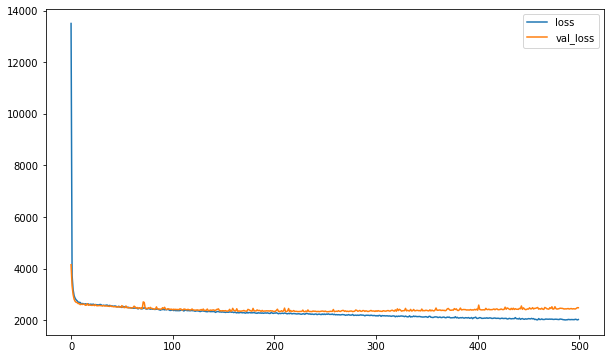

In [0]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:  33.33482539029401
MSE:  1938.5658325439726
RMSE:  44.02914753369605
R2 Square:  0.5542818617842332
=========Testing Result=======
MAE:  37.33165232530754
MSE:  2489.0096504185562
RMSE:  49.889975450169906
R2 Square:  0.4313503237829115


In [0]:
#Now looking at availability

In [0]:
data_filtered[['availability_30']].isnull().sum()

availability_30    0
dtype: int64

In [0]:
data_filtered[['instant_bookable']].head()

,instant_bookable
0,0
1,1
2,1
3,0
4,1


In [0]:
x2 = data_filtered[['price','instant_bookable']]

In [0]:
y2 = data_filtered[['availability_30']]

In [0]:
x2.isnull().sum()

price               0
instant_bookable    0
dtype: int64

In [0]:
#using a simple model
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.038688692054402174


In [0]:
#Using a more complicated model - same independent variables as price (ex availability)
x2 = data_filtered[['accommodates','bathrooms','guests_included','extra_people','minimum_nights','cleaning_fee','security_deposit','review_scores_location','TV','iron','dryer','smoke_detector','hangers','hair_dryer','hot_water','carbon_monoxide_detect','Family_kid_friendly','room_type','Laptop_friendly_workspace','property_type','host_identity_verified','neighbourhood_cleansed']]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.07397848762294901


In [0]:
x2[['availability_30']] = data_filtered[['availability_30']]

/Users/kach/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
x2.shape

(20048, 23)

In [0]:
#Using a more complicated model - same independent variables as price (ex availability)
x2 = data_filtered[['instant_bookable','availability_30','accommodates','bathrooms','guests_included','extra_people','minimum_nights','cleaning_fee','security_deposit','review_scores_location','review_scores_cleanliness','review_scores_checkin','review_scores_rating','TV','iron','dryer','smoke_detector','hangers','hair_dryer','hot_water','carbon_monoxide_detect','Family_kid_friendly','room_type','Laptop_friendly_workspace','property_type','host_identity_verified','neighbourhood_cleansed']]

In [0]:
x2.corr().round(decimals=3)

,instant_bookable,availability_30,accommodates,bathrooms,guests_included,extra_people,minimum_nights,cleaning_fee,security_deposit,review_scores_location,review_scores_cleanliness,review_scores_checkin,review_scores_rating,TV,iron,dryer,smoke_detector,hangers,hair_dryer,hot_water,carbon_monoxide_detect,Family_kid_friendly,room_type,Laptop_friendly_workspace,property_type,host_identity_verified,neighbourhood_cleansed
instant_bookable,1.000,-0.105,0.030,0.012,0.030,0.015,0.023,0.070,0.067,0.060,0.078,0.076,0.080,0.063,-0.015,0.067,-0.007,0.081,0.046,0.018,0.030,0.103,0.170,-0.005,-0.104,0.153,-0.015
availability_30,-0.105,1.000,-0.020,0.005,0.021,0.079,0.044,0.009,0.027,-0.046,-0.057,-0.054,-0.064,-0.053,-0.017,-0.025,-0.038,-0.062,-0.067,-0.109,-0.052,-0.084,-0.175,-0.002,0.103,-0.050,0.005
accommodates,0.030,-0.020,1.000,0.328,0.383,0.167,0.012,0.297,0.103,-0.026,-0.031,-0.019,-0.023,0.129,-0.096,0.172,-0.048,-0.044,-0.051,-0.006,-0.028,0.310,0.239,-0.074,0.173,0.011,0.103
bathrooms,0.012,0.005,0.328,1.000,0.140,0.041,0.033,0.177,0.051,-0.024,-0.025,-0.028,-0.023,0.056,-0.098,0.150,-0.067,-0.050,-0.080,-0.033,-0.042,0.086,0.039,-0.063,0.130,0.008,0.056
guests_included,0.030,0.021,0.383,0.140,1.000,0.403,0.007,0.215,0.110,0.086,0.088,0.095,0.090,0.047,-0.069,0.087,-0.041,-0.028,-0.068,-0.056,-0.041,0.219,0.095,-0.073,0.053,0.086,0.034
extra_people,0.015,0.079,0.167,0.041,0.403,1.000,-0.009,0.135,0.119,0.065,0.065,0.070,0.065,0.004,-0.056,0.043,-0.024,-0.043,-0.057,-0.071,-0.042,0.108,0.001,-0.070,0.004,0.054,-0.003
minimum_nights,0.023,0.044,0.012,0.033,0.007,-0.009,1.000,0.045,0.040,-0.007,-0.008,-0.007,-0.008,0.009,-0.013,0.026,-0.002,-0.004,-0.003,-0.000,-0.011,0.018,0.020,-0.004,-0.004,0.016,0.001
cleaning_fee,0.070,0.009,0.297,0.177,0.215,0.135,0.045,1.000,0.264,0.105,0.097,0.085,0.094,0.146,-0.101,0.138,-0.073,-0.107,-0.100,-0.066,-0.094,0.155,0.255,-0.150,-0.002,-0.003,-0.044
security_deposit,0.067,0.027,0.103,0.051,0.110,0.119,0.040,0.264,1.000,0.043,0.047,0.044,0.045,0.054,-0.060,0.069,-0.030,-0.044,-0.040,-0.059,-0.040,0.067,0.109,-0.066,-0.007,0.032,-0.004
review_scores_location,0.060,-0.046,-0.026,-0.024,0.086,0.065,-0.007,0.105,0.043,1.000,0.958,0.972,0.971,0.011,-0.064,-0.013,-0.058,-0.076,-0.095,-0.161,-0.061,0.096,-0.010,-0.094,-0.067,0.108,-0.099


In [0]:
#Using a more complicated model
x2 = data_filtered[['instant_bookable','review_scores_location','review_scores_cleanliness','review_scores_checkin','review_scores_rating','TV','dryer','smoke_detector','hangers','hair_dryer','hot_water','carbon_monoxide_detect','Family_kid_friendly','room_type']]

In [0]:
y2

,availability_30
0,8
1,0
2,4
3,6
4,2
...,...
20672,9
20673,16
20674,22
20675,29


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.05984970264260259


In [0]:
x2=data_filtered[['room_type','instant_bookable']]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.03594313459826515


In [0]:
data_filtered.corr().round(decimals=3)

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,smoke_detector,TV,washer,hangers,Laptop_friendly_workspace,iron,shampoo,hair_dryer,hot_water,dryer,fire_ex,carbon_monoxide_detect,Family_kid_friendly,distance,size
id,1.000,-0.0,0.505,0.050,0.078,0.078,0.309,-0.002,-0.285,0.088,-0.007,0.014,0.005,0.053,-0.061,-0.001,0.051,-0.035,-0.035,0.067,-0.040,-0.044,-0.141,-0.054,-0.031,0.044,-0.031,-0.026,0.022,0.031,-0.028,0.026,0.156,0.151,0.138,-0.017,-0.321,-0.068,-0.250,-0.255,-0.250,-0.259,-0.257,-0.240,-0.252,-0.236,NaN,0.164,0.079,0.076,0.066,0.058,0.181,-0.002,-0.089,0.070,-0.127,-0.012,-0.048,-0.010,-0.051,-0.043,-0.037,NaN,0.011,-0.389,0.070,-0.015
scrape_id,-0.000,1.0,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,NaN,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,NaN,0.000,0.000,-0.000,0.000
host_id,0.505,-0.0,1.000,0.034,0.017,0.017,0.359,0.020,-0.364,0.051,-0.004,0.025,0.008,0.135,-0.086,0.008,0.004,-0.041,0.002,0.025,-0.038,-0.046,-0.078,-0.028,-0.023,0.062,-0.023,-0.017,0.018,0.035,-0.019,0.025,0.165,0.174,0.171,0.089,-0.135,0.009,-0.158,-0.156,-0.154,-0.155,-0.153,-0.140,-0.154,-0.235,NaN,0.100,0.014,0.011,0.066,0.069,0.168,0.036,-0.036,0.121,-0.066,0.016,0.020,-0.003,-0.002,0.006,-0.072,NaN,0.028,-0.214,0.035,-0.009
host_is_superhost,0.050,-0.0,0.034,1.000,0.054,0.054,0.021,0.016,-0.064,0.012,-0.011,-0.003,-0.024,-0.015,0.197,0.035,0.010,0.071,0.028,-0.004,-0.011,0.013,-0.034,-0.050,0.001,0.064,0.003,-0.001,0.058,0.059,0.001,0.059,-0.086,-0.109,-0.133,-0.149,-0.360,-0.438,-0.166,-0.166,-0.176,-0.163,-0.159,-0.157,-0.160,0.051,NaN,0.089,0.059,0.063,-0.078,0.029,-0.378,0.074,0.047,-0.083,0.124,0.079,0.092,0.138,0.166,0.226,0.018,NaN,0.108,0.001,0.019,-0.019
host_listings_count,0.078,0.0,0.017,0.054,1.000,1.000,-0.047,-0.007,-0.109,-0.029,0.008,-0.014,0.032,-0.028,0.058,0.004,0.009,-0.003,0.002,0.002,-0.021,0.099,-0.025,-0.006,-0.010,-0.025,-0.006,0.001,-0.025,-0.026,-0.002,-0.026,-0.007,-0.012,-0.017,-0.019,-0.038,-0.034,-0.030,-0.023,-0.023,-0.047,-0.035,-0.018,-0.032,-0.156,NaN,-0.099,0.893,0.892,0.097,0.348,-0.035,-0.044,0.039,0.036,-0.044,-0.069,0.040,0.050,-0.026,0.092,-0.015,NaN,-0.058,-0.020,-0.035,0.018
host_total_listings_count,0.078,0.0,0.017,0.054,1.000,1.000,-0.047,-0.007,-0.109,-0.029,0.008,-0.014,0.032,-0.028,0.058,0.004,0.009,-0.003,0.002,0.002,-0.021,0.099,-0.025,-0.006,-0.010,-0.025,-0.006,0.001,-0.025,-0.026,-0.002,-0.026,-0.007,-0.012,-0.017,-0.019,-0.038,-0.034,-0.030,-0.023,-0.023,-0.047,-0.035,-0.018,-0.032,-0.156,NaN,-0.099,0.893,0.892,0.097,0.348,-0.035,-0.044,0.039,0.036,-0.044,-0.069,0.040,0.050,-0.026,0.092,-0.015,NaN,-0.058,-0.020,-0.035,0.018
host_verifications,0.309,-0.0,0.359,0.021,-0.047,-0.047,1.000,0.031,-0.224,0.017,-0.018,0.033,0.006,0.047,-0.062

In [0]:
x2=data_filtered[['room_type','instant_bookable','host_is_superhost','review_scores_cleanliness','review_scores_checkin']]

In [0]:
y2

,availability_30
0,8
1,0
2,4
3,6
4,2
...,...
20672,9
20673,16
20674,22
20675,29


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
print(model.score(x_test, y_test))

0.038258993323101564


In [0]:
mod = ols('availability_30 ~ room_type', data=data_filtered).fit()

In [0]:
aov_table = sm.stats.anova_lm(mod, typ=2)

In [0]:
print(aov_table)

                  sum_sq       df           F         PR(>F)
room_type   29044.193588      1.0  636.876584  2.298585e-138
Residual   914180.107889  20046.0         NaN            NaN
